# EDA

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [31]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
training=pd.read_csv('data/training.csv')

In [32]:
train.head()

TweetId     Label  \
0  304271250237304833  Politics   
1  304834304222064640  Politics   
2  303568995880144898    Sports   
3  304366580664528896    Sports   
4  296770931098009601    Sports   

                                           TweetText  
0  '#SecKerry: The value of the @StateDept and @U...  
1                            '@rraina1481 I fear so'  
2  'Watch video highlights of the #wwc13 final be...  
3  'RT @chelscanlan: At Nitro Circus at #AlbertPa...  
4  '@cricketfox Always a good thing. Thanks for t...

In [33]:
train.isnull().sum()

TweetId      0
Label        0
TweetText    0
dtype: int64

In [34]:
test.isnull().sum()

TweetId      0
TweetText    0
dtype: int64

In [35]:
train['Label'].value_counts()

Label
Sports      3325
Politics    3200
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

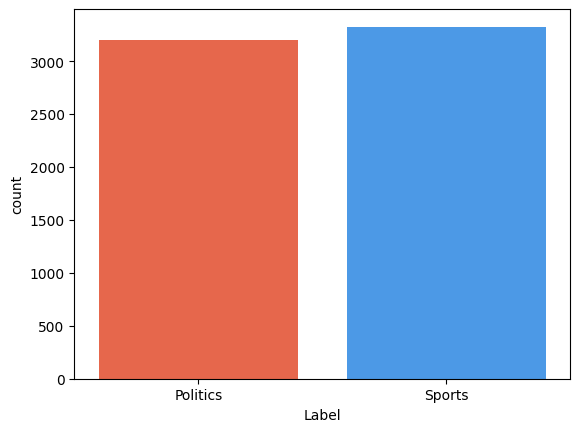

In [36]:
sns.countplot(x="Label",data =train, palette=["#FF5733", "#3399FF", "#33FF7A"])

In [37]:
train.shape

(6525, 3)

In [38]:
def clean_column(train):
    train['TweetText'] = train['TweetText'].str.replace('.', '') # remove . from string in list of strings in train 
    train['TweetText'] = train['TweetText'].str.replace('!', '')
    train['TweetText'] = train['TweetText'].str.replace('?', '')
    train['TweetText'] = train['TweetText'].str.replace('(', '')
    train['TweetText'] = train['TweetText'].str.replace(')', '')
    train['TweetText'] = train['TweetText'].str.replace('-', '')
clean_column(train)

In [39]:
# Cleaning the tweets 
import re
def cleanTxt(text):
    text=re.sub('@[A-Za-z0–9]+','',text) #Removing @mentions
    text=re.sub('#', '', text) # Removing '#' hash tag
    text=re.sub('RT[\s]+', '', text) # Removing RT
    text=re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    text=re.sub(':', '', text)
    text=re.sub("'", '', text)
    text=re.sub(",", '', text)
    text=re.sub(";", '', text)
    text=re.sub("&", '', text)
    text=re.sub("``", '', text)
    text=re.sub('"', '', text)
    return text
train['TweetText']=train['TweetText'].apply(cleanTxt)

In [40]:
train.head()

TweetId     Label  \
0  304271250237304833  Politics   
1  304834304222064640  Politics   
2  303568995880144898    Sports   
3  304366580664528896    Sports   
4  296770931098009601    Sports   

                                           TweetText  
0  SecKerry The value of the  and  is measured no...  
1                                     1481 I fear so  
2  Watch video highlights of the wwc13 final betw...  
3   At Nitro Circus at AlbertPark  theymakeitlook...  
4       Always a good thing Thanks for the feedback

In [41]:
!pip install nltk 

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [42]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\MSI
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
#tokenization
train['TweetText'] = train['TweetText'].apply(nltk.word_tokenize)

In [44]:
train.head()

TweetId     Label  \
0  304271250237304833  Politics   
1  304834304222064640  Politics   
2  303568995880144898    Sports   
3  304366580664528896    Sports   
4  296770931098009601    Sports   

                                           TweetText  
0  [SecKerry, The, value, of, the, and, is, measu...  
1                                [1481, I, fear, so]  
2  [Watch, video, highlights, of, the, wwc13, fin...  
3  [At, Nitro, Circus, at, AlbertPark, theymakeit...  
4  [Always, a, good, thing, Thanks, for, the, fee...

In [45]:
"""def tolist(x):
    return x.split(' ')
train['TweetText']=train['TweetText'].apply(tolist)
train['TweetText'].astype(str)"""

"def tolist(x):\n    return x.split(' ')\ntrain['TweetText']=train['TweetText'].apply(tolist)\ntrain['TweetText'].astype(str)"

In [46]:
#remove null strings 
def remove_empty(x):
    return [item for item in x if item != '']
train['TweetText']=train['TweetText'].apply(remove_empty)



In [47]:
train.head()

TweetId     Label  \
0  304271250237304833  Politics   
1  304834304222064640  Politics   
2  303568995880144898    Sports   
3  304366580664528896    Sports   
4  296770931098009601    Sports   

                                           TweetText  
0  [SecKerry, The, value, of, the, and, is, measu...  
1                                [1481, I, fear, so]  
2  [Watch, video, highlights, of, the, wwc13, fin...  
3  [At, Nitro, Circus, at, AlbertPark, theymakeit...  
4  [Always, a, good, thing, Thanks, for, the, fee...

In [48]:
# lowercase all words in train
def lower_case(data):
    for i in range(data.shape[0]) :
        data['TweetText'][i] = [x.lower() for x in data['TweetText'][i]]
    return data
lower_case(train)

C:\Users\MSI PC\AppData\Local\Temp\ipykernel_30400\1933219485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TweetText'][i] = [x.lower() for x in data['TweetText'][i]]
C:\Users\MSI PC\AppData\Local\Temp\ipykernel_30400\1933219485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TweetText'][i] = [x.lower() for x in data['TweetText'][i]]
C:\Users\MSI PC\AppData\Local\Temp\ipykernel_30400\1933219485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

TweetId     Label  \
0     304271250237304833  Politics   
1     304834304222064640  Politics   
2     303568995880144898    Sports   
3     304366580664528896    Sports   
4     296770931098009601    Sports   
...                  ...       ...   
6520  296675082267410433  Politics   
6521  306677536195231746    Sports   
6522  306451295307431937    Sports   
6523  306088574221176832    Sports   
6524  277090953242759169  Politics   

                                              TweetText  
0     [seckerry, the, value, of, the, and, is, measu...  
1                                   [1481, i, fear, so]  
2     [watch, video, highlights, of, the, wwc13, fin...  
3     [at, nitro, circus, at, albertpark, theymakeit...  
4     [always, a, good, thing, thanks, for, the, fee...  
...                                                 ...  
6520  [photo, pm, has, laid, a, wreath, at, martyrs,...  
6521  [the, secret, of, the, chennai, pitch, crumbli...  
6522                    [he, isnt, on, twitter, either]  
6523  [which, england, player, would, you, take, out...  
6524  [dmitry, medvedev, expressed, condolences, to,...  

[6525 rows x 3 columns]

In [49]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\MSI
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
# removing stop words and update the weights
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
def remove_stopwords(data):
    for i in range(data.shape[0]) :
        for word in  stop_words:
            if word in data['TweetText'][i]:
                data['TweetText'][i].remove(word)
    return data
train = remove_stopwords(train)

In [51]:
nltk.download('wordnet')
nltk.download()

[nltk_data] Downloading package wordnet to C:\Users\MSI
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [52]:
import nltk
nltk.data.path.append("C:/Users/MSI/nltk_data")

In [53]:
#lemmatization1
wnl = nltk.WordNetLemmatizer()

def lemmatization(data):
    for i in range(data.shape[0]):
        lemmatized_tweet = []
        for word in data['TweetText'][i]:
            lemmatized_word = wnl.lemmatize(word)
            lemmatized_tweet.append(lemmatized_word)
        data['TweetText'][i] = lemmatized_tweet
    return data
    
train = lemmatization(train)

C:\Users\MSI PC\AppData\Local\Temp\ipykernel_30400\1795748776.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TweetText'][i] = lemmatized_tweet
C:\Users\MSI PC\AppData\Local\Temp\ipykernel_30400\1795748776.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TweetText'][i] = lemmatized_tweet
C:\Users\MSI PC\AppData\Local\Temp\ipykernel_30400\1795748776.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TweetTex

# Text Vectorization 

## TF-IDF

In [54]:
!pip install sklearn --user

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [55]:
# Tf-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.7)
X = tfidfconverter.fit_transform(train['TweetText']).toarray()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from collections import Counter
def word_count(data):
    freqs = {}
    for i in range(data.shape[0]) :
        label = data['Label'][i]
        for word in  data['TweetText'][i]:
            pair = ((word,label))
            if pair in freqs :
                freqs[pair] += 1
            else :
                freqs[pair] = 1
    return freqs

In [ ]:
word_count(train)
# same function as above but return word its label and count 
df=pd.DataFrame.from_dict(word_count(train), orient='index', columns=['count'])
#create the two columns word , label 
df.reset_index(inplace=True)
df[['word','label']] = pd.DataFrame(df['index'].tolist(), index=df.index)
df.drop(columns=['index'], inplace=True)


In [ ]:
#sort by count
df.sort_values(by=['count'], ascending=False, inplace=True)

In [ ]:
#reindex
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df.head()

count       word     label
0    694        the  Politics
1    645        the    Sports
2    422        amp  Politics
3    348  president  Politics
4    347    indvaus    Sports

In [ ]:
#create the weights column
df['weights']=df['count']/df.groupby('label')['count'].transform('sum')
df.head()

count       word     label   weights
0    694        the  Politics  0.020302
1    645        the    Sports  0.018362
2    422        amp  Politics  0.012345
3    348  president  Politics  0.010180
4    347    indvaus    Sports  0.009879

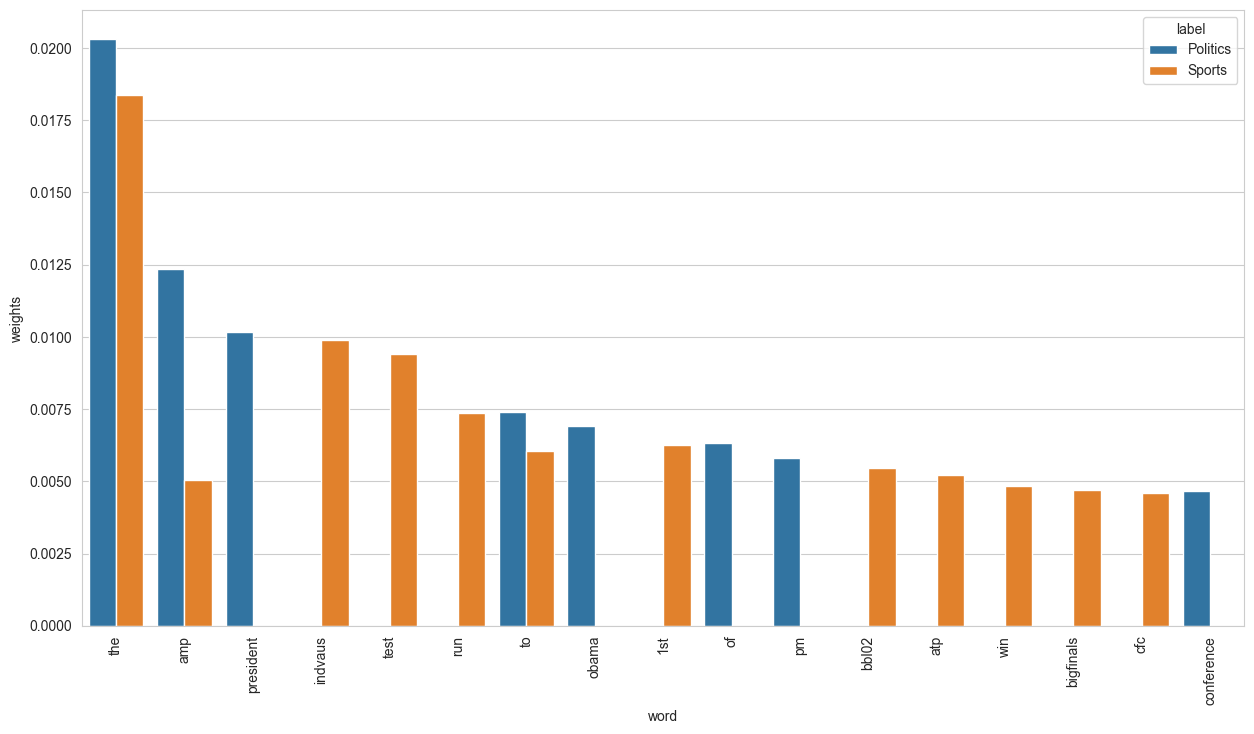

In [ ]:
#plot the weights
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
sns.barplot(x='word', y='weights', hue='label', data=df.head(20))
plt.xticks(rotation=90)
plt.show()

## Embeddings 

In [ ]:
!pip install torch 

  Using cached torch-2.0.1-cp311-cp311-win_amd64.whl (172.3 MB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached MarkupSafe-2.1.3-cp311-cp311-win_amd64.whl (17 kB)


ERROR: Could not install packages due to an OSError: [WinError 2] Le fichier spécifié est introuvable: 'C:\\Python311\\Scripts\\convert-caffe2-to-onnx.exe' -> 'C:\\Python311\\Scripts\\convert-caffe2-to-onnx.exe.deleteme'


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install transformers


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Word embeddings with BERT 
import torch
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True,)
model.eval()

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Python311\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MSI PC\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/a

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [ ]:
# 